# Loading and processing data

### 1. Let's load the training data:

In [1]:
from torchvision import datasets
import torchvision.transforms as transforms
import os

path2data = "./data"

if not os.path.exists(path2data):
    os.mkdir(path2data)

data_transformer = transforms.Compose([transforms.ToTensor()])

train_ds = datasets.STL10(path2data, split="train",
                          download=True, transform=data_transformer)
print(train_ds.data.shape)

Files already downloaded and verified
(5000, 3, 96, 96)


### 2. Then count the number of images per category in train_ds:

In [2]:
import collections

y_train = [y for _,y in train_ds]
counter_train = collections.Counter(y_train)
print(counter_train)

Counter({1: 500, 5: 500, 6: 500, 3: 500, 9: 500, 7: 500, 4: 500, 8: 500, 0: 500, 2: 500})


### 3. Let's then load the test dataset and call it test0_ds:

In [3]:
test0_ds = datasets.STL10(path2data, split='test',
                          download=True, transform=data_transformer)
print(test0_ds.data.shape)

Files already downloaded and verified
(8000, 3, 96, 96)


### 4. Next, split the indices of test0_ds into two groups:

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
                             random_state=0)

indices = list(range(len(test0_ds)))
y_test0 = [y for _,y in test0_ds]

for test_index, val_index in sss.split(indices, y_test0):
    print("test:", test_index, "val:", val_index)
    print(len(val_index), len(test_index))

test: [2096 4321 2767 ... 3206 3910 2902] val: [6332 6852 1532 ... 5766 4469 1011]
1600 6400


### 5. Then create two datasets from test0_ds:

In [5]:
from torch.utils.data import Subset

val_ds = Subset(test0_ds, val_index)
test_ds = Subset(test0_ds, test_index)

### 6. Next, count the number of images per class in val_ds and test_ds:

In [6]:
import collections
import numpy as np

y_test = [y for _,y in test_ds]
y_val = [y for _,y in val_ds]

counter_test = collections.Counter(y_test)
counter_val = collections.Counter(y_val)
print(counter_test)
print(counter_val)

Counter({6: 640, 0: 640, 4: 640, 5: 640, 9: 640, 2: 640, 3: 640, 1: 640, 7: 640, 8: 640})
Counter({2: 160, 8: 160, 3: 160, 6: 160, 4: 160, 1: 160, 5: 160, 9: 160, 0: 160, 7: 160})


### 6. Let's show a few sample images from train_ds. We will import the required packages.

In [7]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(0)

Now, we will define the helper function:

In [8]:
def show(img, y=None, color=True):
    npimg = img.numpy()
    npimg_tr = np.transpose(npimg, (1, 2, 0))
    
    plt.imshow(npimg_tr)
    
    if y is not None:
        plt.title("label: " + str(y))

In [9]:
# pick random samples
grid_size = 4
rnd_inds = np.random.randint(0, len(train_ds), grid_size)
print("image indices:", rnd_inds)

image indices: [2732 2607 1653 3264]


In [10]:
# we will create a grid from the sample images:

x_grid = [train_ds[i][0] for i in rnd_inds]
y_grid = [train_ds[i][1] for i in rnd_inds]

x_grid = utils.make_grid(x_grid, nrow=4, padding=1)
print(x_grid.shape)

torch.Size([3, 98, 389])


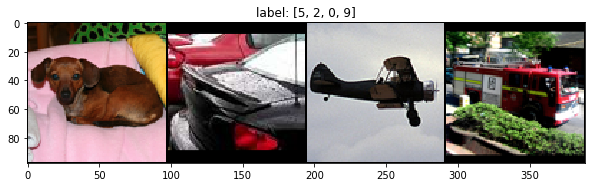

In [11]:
# Then, we will call the helper function to display the grid:
# call helper function
plt.figure(figsize=(10, 10))
show(x_grid, y_grid)

### 8. Let's show sample images from val_ds:

image indices: [ 684  559 1216  835]
torch.Size([3, 100, 394])


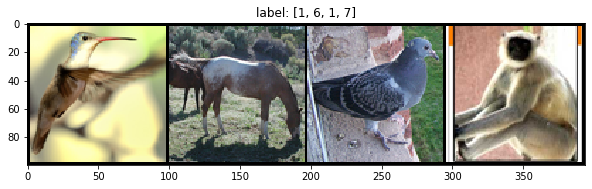

In [12]:
np.random.seed(0)

grid_size = 4
rnd_inds = np.random.randint(0, len(val_ds), grid_size)
print("image indices:", rnd_inds)

x_grid = [val_ds[i][0] for i in rnd_inds]
y_grid = [val_ds[i][1] for i in rnd_inds]

x_grid = utils.make_grid(x_grid, nrow=4, padding=2)
print(x_grid.shape)

plt.figure(figsize=(10, 10))
show(x_grid, y_grid)

### 9. Let's calculate the mean and standard deviation of train_ds:

In [13]:
import numpy as np

mean_rgb = [np.mean(x.numpy(), axis=(1, 2)) for x,_ in train_ds]
std_rgb = [np.std(x.numpy(), axis=(1, 2)) for x,_ in train_ds]

mean_r = np.mean([m[0] for m in mean_rgb])
mean_g = np.mean([m[1] for m in mean_rgb])
mean_b = np.mean([m[2] for m in mean_rgb])

std_r = np.mean([s[0] for s in std_rgb])
std_g = np.mean([s[1] for s in std_rgb])
std_b = np.mean([s[2] for s in std_rgb])

print(mean_r, mean_g, mean_b)
print(std_r, std_g, std_b)

0.4467106 0.43980986 0.40664646
0.22414584 0.22148906 0.22389975


### 10. Let's define the image transformation for train_ds and test0_ds:

In [14]:
train_transformer = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([mean_r, mean_g, mean_b],
                         [std_r, std_g, std_b])
])

test0_transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([mean_r, mean_g, mean_b],
                         [std_r, std_g, std_b])
])

### 11. Update the transform functions of train_ds and test0_ds:

In [15]:
train_ds.transform = train_transformer
test0_ds.transform = test0_transformer

### 12. Next, we will display the transformed sample images from train_ds:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image indices: [2732 2607 1653 3264]
torch.Size([3, 100, 394])


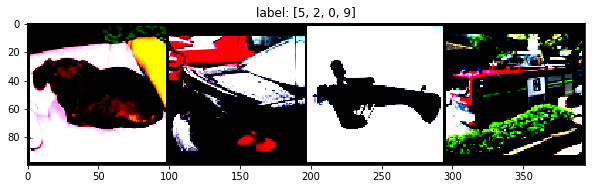

In [16]:
import torch
np.random.seed(0)
torch.manual_seed(0)

grid_size = 4
rnd_inds = np.random.randint(0, len(train_ds), grid_size)
print("image indices:", rnd_inds)

x_grid = [train_ds[i][0] for i in rnd_inds]
y_grid = [train_ds[i][1] for i in rnd_inds]

x_grid = utils.make_grid(x_grid, nrow=4, padding=2)
print(x_grid.shape)

plt.figure(figsize=(10, 10))
show(x_grid, y_grid)

### 13. Let's create dataloaders from train_ds and val_ds:

In [17]:
from torch.utils.data import DataLoader

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=64, shuffle=False)

### 14. Then get a batch of data from train_dl:

In [18]:
for x, y in train_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([32, 3, 96, 96])
torch.Size([32])


### 15. Next, get a batch of data from val_dl:

In [19]:
# extract a batch from validation data
for x,y in val_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([64, 3, 96, 96])
torch.Size([64])


# Building the model

### 1. Let's import the resnet18 model with random weights from torchvision.models:

In [20]:
from torchvision import models
import torch

model_resnet18 = models.resnet18(pretrained=False)

### 2. Let's print the model

In [21]:
print(model_resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### 3. Let's change the output layer to 10 classes:

In [22]:
from torch import nn

num_classes = 10
num_filters = model_resnet18.fc.in_features
model_resnet18.fc = nn.Linear(num_filters, num_classes)

device = torch.device("cuda:0")
model_resnet18.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### 4. Let's get the model summary:

In [23]:
from torchsummary import summary
summary(model_resnet18, input_size=(3, 224, 224), device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

### 5. Let's visualize the filters of the first CNN layer:
Let's get the weights of the first layer:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([64, 3, 7, 7])
0.0 1.1186091899871826
torch.Size([3, 65, 65])


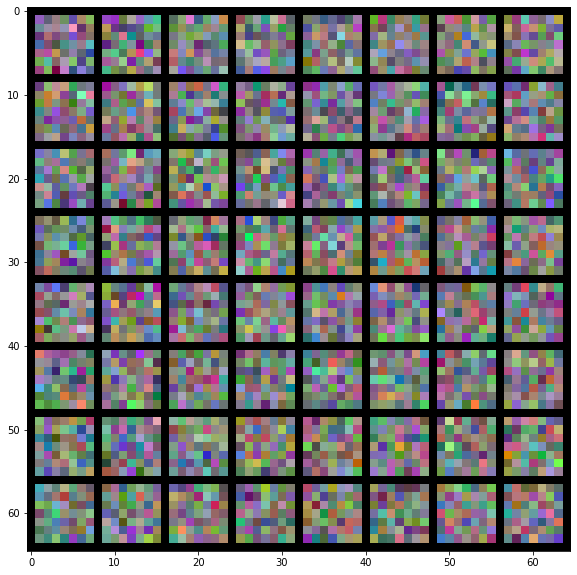

In [24]:
for w in model_resnet18.parameters():
    w = w.data.cpu()
    print(w.shape)
    break

# then, normalize the weights:
min_w = torch.min(w)
w1 = (-1/(2*min_w)) * w + 0.5
print(torch.min(w1).item(), torch.max(w1).item())

# Next, make a grid and display it:
grid_size = len(w1)
x_grid = [w1[i] for i in range(grid_size)]
x_grid = utils.make_grid(x_grid, nrow=8, padding=1)
print(x_grid.shape)

plt.figure(figsize=(10, 10))
show(x_grid)

### 6. Let's load resnet18 with the pre-trained weights:

In [25]:
from torchvision import models
import torch

resnet18_pretrained = models.resnet18(pretrained=True)

num_classes = 10
num_filters = resnet18_pretrained.fc.in_features
resnet18_pretrained.fc = nn.Linear(num_filters, num_classes)

device = torch.device("cuda:0")
resnet18_pretrained.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### 7. Let's visualize the filters of the first CNN layer using the snippet from step 5:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([64, 3, 7, 7])
0.0 1.102618932723999
torch.Size([3, 65, 65])


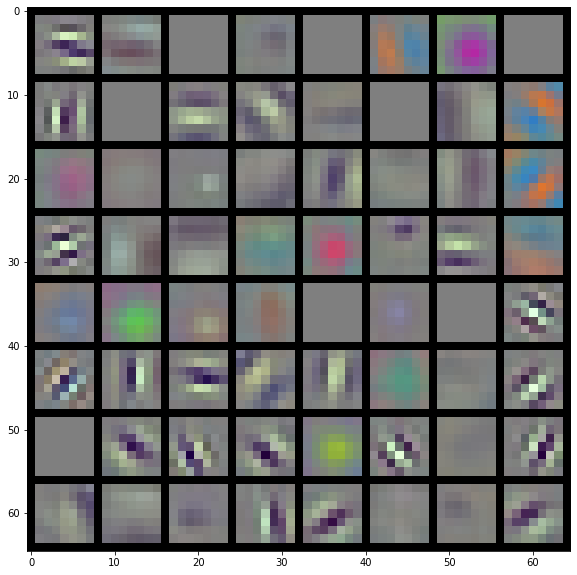

In [26]:
# use the code snippet in step 5
for w in resnet18_pretrained.parameters():
    w = w.data.cpu()
    print(w.shape)
    break

# then, normalize the weights:
min_w = torch.min(w)
w1 = (-1/(2*min_w)) * w + 0.5
print(torch.min(w1).item(), torch.max(w1).item())

# Next, make a grid and display it:
grid_size = len(w1)
x_grid = [w1[i] for i in range(grid_size)]
x_grid = utils.make_grid(x_grid, nrow=8, padding=1)
print(x_grid.shape)

plt.figure(figsize=(10, 10))
show(x_grid)

# Defining the loss function

### 1. Define the loss function as the following

In [27]:
loss_func = nn.CrossEntropyLoss(reduction="sum")

### 2. Let's see the loss in an example

In [28]:
torch.manual_seed(0)

n, c = 4, 5
y = torch.randn(n, c, requires_grad=True)
print(y.shape)

loss_func = nn.CrossEntropyLoss(reduction="sum")
target = torch.randint(c, size=(n,))
print(target.shape)

loss = loss_func(y, target)
print(loss.item())

torch.Size([4, 5])
torch.Size([4])
7.312585353851318


### 3. Let's compute the gradients of loss with respect to y:

In [29]:
loss.backward()
print(y.data)

tensor([[-1.1258, -1.1524, -0.2506, -0.4339,  0.5988],
        [-1.5551, -0.3414,  1.8530,  0.4681, -0.1577],
        [ 1.4437,  0.2660,  1.3894,  1.5863,  0.9463],
        [-0.8437,  0.9318,  1.2590,  2.0050,  0.0537]])


# Defining the optimizer 

### 1. Define an Adam optimizer object with a learning rate of 1e-4: 

In [30]:
from torch import optim
opt = optim.Adam(model_resnet18.parameters(), lr=1e-4)

### 2. We can read the current value of the learning rate using the following function:

In [31]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

current_lr = get_lr(opt)
print('current lr = {}'.format(current_lr))

current lr = 0.0001


### 3. Define a learning scheduler using the CosineAnnealingLR method:

In [32]:
from torch.optim.lr_scheduler import CosineAnnealingLR

lr_scheduler = CosineAnnealingLR(opt, T_max=2, eta_min=1e-5)

### 4. Let's see how the learning rate schedule works using the following example:

In [33]:
for i in range(10):
    lr_scheduler.step()
    print("epoch %s, lr: %.1e" %(i, get_lr(opt)))

epoch 0, lr: 5.5e-05
epoch 1, lr: 1.0e-05
epoch 2, lr: 5.5e-05
epoch 3, lr: 1.0e-04
epoch 4, lr: 5.5e-05
epoch 5, lr: 1.0e-05
epoch 6, lr: 5.5e-05
epoch 7, lr: 1.0e-04
epoch 8, lr: 5.5e-05
epoch 9, lr: 1.0e-05


/home/sp/anaconda3/envs/test_env/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


# Training and transfer learning

### 1. First, develop a helper function to count the number of correct predictions per data batch:

In [34]:
def metrics_batch(output, target):
    pred = output.argmax(dim=1, keepdim=True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects

### 2. We then develop a helper function to compute the loss value per batch of data:

In [35]:
def loss_batch(loss_function, output, target, opt=None):
    loss = loss_function(output, target)
    metric_b = metrics_batch(output, target)
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
        
    return loss.item(), metric_b

### 3. Next, we develop a helper function to compute the loss value and the performance metric for the entire dataset or an epoch. 

In [36]:
def loss_epoch(model, loss_function, dataset_data_loader,
               sanity_check=False, optimizer=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_data_loader.dataset)
    
    for xb, yb in dataset_data_loader:
        xb = xb.to(device)
        yb = yb.to(device)
        
        output = model(xb)
        
        loss_b, metric_b = loss_batch(loss_function, output,
                                      yb, optimizer)
        running_loss = running_loss + loss_b
        
        if metric_b is not None:
            running_metric = running_metric + metric_b
            
        if sanity_check is True:
            break
            
    loss = running_loss / float(len_data)
    metric = running_metric / float(len_data)
    return loss, metric

### 4. Let's develop the train_val function in the following code block.

In [37]:
def train_val(model, params):
    num_epochs = params["num_epochs"]
    loss_function = params["loss_function"]
    optimizer = params["optimizer"]
    train_data_loader = params["train_data_loader"]
    val_data_loader = params["val_data_loader"]
    sanity_check = params["sanity_check"]
    lr_scheduler = params["lr_scheduler"]
    path2weights = params["path2weights"]
    
    loss_history = {
        "train": [],
        "val": [],
    }
    
    metric_history = {
        "train": [],
        "val": [],
    }
    
    best_model_weights = copy.deepcopy(model.state_dict())
    best_loss = float('inf')
    
    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr = {}'.format(
                epoch, num_epochs - 1, current_lr))
        model.train()
        
        train_loss, train_metric = loss_epoch(model,
                                              loss_function,
                                              train_data_loader,
                                              sanity_check,
                                              optimizer)
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model,
                                              loss_function,
                                              val_data_loader,
                                              sanity_check)
            loss_history["val"].append(val_loss)
            metric_history["val"].append(val_metric)
            
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_weights = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), path2weights)
            print("Copied best model weights!")
            
        lr_scheduler.step()
        
        print("Train loss: %.6f, dev loss: %.6f, accuracy: %.2f"
             %(train_loss, val_loss, 100*val_metric))
        print("-"*10)
        
    model.load_state_dict(best_model_weights)
    
    return model, loss_history, metric_history

### 5. Let's train the model by calling the train_val function.

In [38]:
import copy

loss_function = nn.CrossEntropyLoss(reduction="sum")
optimizer = optim.Adam(model_resnet18.parameters(), lr=1e-4)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=5,
                                 eta_min=1e-6)

os.makedirs("./models", exist_ok=True)

params_train = {
    "num_epochs": 100,
    "optimizer": optimizer,
    "loss_function": loss_function,
    "train_data_loader": train_dl,
    "val_data_loader": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": "./models/resnet18.pt",
}

model_resnet18, loss_history, metric_history = train_val(model_resnet18, params_train)

Epoch 0/99, current lr = 1e-05
Copied best model weights!
Train loss: 1.778131, dev loss: 1.619344, accuracy: 38.31
----------
Epoch 1/99, current lr = 1e-05
Copied best model weights!
Train loss: 1.454008, dev loss: 1.479895, accuracy: 45.94
----------
Epoch 2/99, current lr = 1e-05
Copied best model weights!
Train loss: 1.257966, dev loss: 1.365938, accuracy: 50.69
----------
Epoch 3/99, current lr = 1e-05
Copied best model weights!
Train loss: 1.070077, dev loss: 1.309794, accuracy: 52.19
----------
Epoch 4/99, current lr = 1e-05
Copied best model weights!
Train loss: 0.907877, dev loss: 1.243786, accuracy: 54.19
----------
Epoch 5/99, current lr = 1e-05
Train loss: 0.848585, dev loss: 1.247204, accuracy: 53.62
----------
Epoch 6/99, current lr = 1e-05
Train loss: 0.852797, dev loss: 1.246982, accuracy: 54.00
----------
Epoch 7/99, current lr = 1e-05
Train loss: 0.839442, dev loss: 1.309820, accuracy: 52.25
----------
Epoch 8/99, current lr = 1e-05
Train loss: 0.847095, dev loss: 1.

Train loss: 0.212279, dev loss: 2.101475, accuracy: 52.81
----------
Epoch 81/99, current lr = 1e-05
Train loss: 0.175748, dev loss: 1.991266, accuracy: 54.44
----------
Epoch 82/99, current lr = 1e-05
Train loss: 0.113331, dev loss: 1.864728, accuracy: 56.88
----------
Epoch 83/99, current lr = 1e-05
Train loss: 0.054264, dev loss: 1.827606, accuracy: 56.81
----------
Epoch 84/99, current lr = 1e-05
Train loss: 0.036169, dev loss: 1.815390, accuracy: 57.81
----------
Epoch 85/99, current lr = 1e-05
Train loss: 0.026950, dev loss: 1.820572, accuracy: 57.38
----------
Epoch 86/99, current lr = 1e-05
Train loss: 0.028002, dev loss: 1.821589, accuracy: 56.75
----------
Epoch 87/99, current lr = 1e-05
Train loss: 0.027312, dev loss: 1.902964, accuracy: 56.19
----------
Epoch 88/99, current lr = 1e-05
Train loss: 0.027310, dev loss: 2.064166, accuracy: 56.00
----------
Epoch 89/99, current lr = 1e-05
Train loss: 0.073758, dev loss: 2.282295, accuracy: 53.87
----------
Epoch 90/99, current l

### 6. Next, we will plot the progress of the loss values throughout the training:

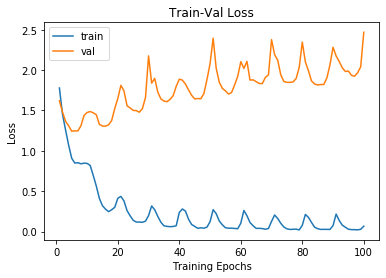

In [40]:
num_epochs = params_train["num_epochs"]

plt.title("Train-Val Loss")
plt.plot(range(1, num_epochs+1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs+1), loss_history["val"], label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

Then, we will plot the progress of the accuracy values throughout the training:

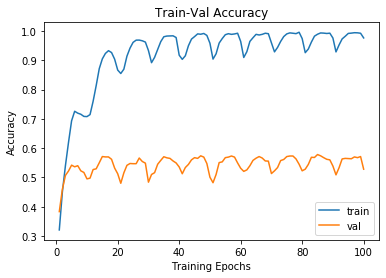

In [41]:
plt.title("Train-Val Accuracy")
plt.plot(range(1, num_epochs+1), metric_history["train"], label="train")
plt.plot(range(1, num_epochs+1), metric_history["val"], label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

### 7. Now, let's train the model with the pre-trained weights:

In [42]:
import copy

loss_function = nn.CrossEntropyLoss(reduction="sum")
optimizer = optim.Adam(resnet18_pretrained.parameters(), lr=1e-4)
lr_scheduler = CosineAnnealingLR(opt, T_max=5, eta_min=1e-6)

params_train = {
    "num_epochs": 100,
    "optimizer": opt,
    "loss_function": loss_function,
    "train_data_loader": train_dl,
    "val_data_loader": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": "./models/resnet18_pretrained.pt",
}

resnet18_pretrained, loss_history, metric_history = train_val(resnet18_pretrained, params_train)

Epoch 0/99, current lr = 0.0001
Copied best model weights!
Train loss: 2.649597, dev loss: 2.761853, accuracy: 8.62
----------
Epoch 1/99, current lr = 9.05463412215599e-05
Train loss: 2.646875, dev loss: 2.776736, accuracy: 8.56
----------
Epoch 2/99, current lr = 6.57963412215599e-05
Train loss: 2.651918, dev loss: 2.773880, accuracy: 8.19
----------
Epoch 3/99, current lr = 3.52036587784401e-05
Train loss: 2.649692, dev loss: 2.778110, accuracy: 8.19
----------
Epoch 4/99, current lr = 1.0453658778440105e-05
Train loss: 2.663172, dev loss: 2.776374, accuracy: 8.06
----------
Epoch 5/99, current lr = 1e-06
Train loss: 2.652912, dev loss: 2.792361, accuracy: 8.44
----------
Epoch 6/99, current lr = 1.0453658778440102e-05
Train loss: 2.648055, dev loss: 2.820080, accuracy: 8.44
----------
Epoch 7/99, current lr = 3.520365877844011e-05
Train loss: 2.668945, dev loss: 2.793565, accuracy: 7.69
----------
Epoch 8/99, current lr = 6.579634122155992e-05
Train loss: 2.655435, dev loss: 2.7809

Train loss: 2.646257, dev loss: 2.772353, accuracy: 8.38
----------
Epoch 72/99, current lr = 6.579634122156029e-05
Train loss: 2.646339, dev loss: 2.791742, accuracy: 8.19
----------
Epoch 73/99, current lr = 3.520365877844051e-05
Train loss: 2.658396, dev loss: 2.800498, accuracy: 8.25
----------
Epoch 74/99, current lr = 1.0453658778440202e-05
Train loss: 2.645717, dev loss: 2.774309, accuracy: 8.56
----------
Epoch 75/99, current lr = 1e-06
Train loss: 2.646828, dev loss: 2.800163, accuracy: 8.44
----------
Epoch 76/99, current lr = 1.0453658778440102e-05
Train loss: 2.644664, dev loss: 2.767455, accuracy: 8.56
----------
Epoch 77/99, current lr = 3.520365877844037e-05
Train loss: 2.651375, dev loss: 2.774509, accuracy: 8.44
----------
Epoch 78/99, current lr = 6.579634122156017e-05
Train loss: 2.647230, dev loss: 2.776294, accuracy: 8.12
----------
Epoch 79/99, current lr = 9.054634122156044e-05
Train loss: 2.649988, dev loss: 2.795084, accuracy: 8.06
----------
Epoch 80/99, curre

### 8. Let's plot the training-validation progress:

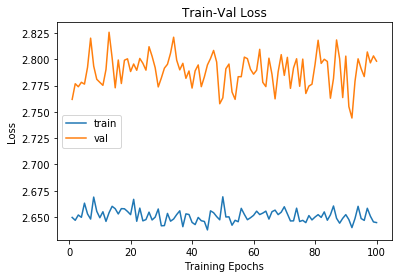

In [43]:
# use the same code as step 6
num_epochs = params_train["num_epochs"]

plt.title("Train-Val Loss")
plt.plot(range(1, num_epochs+1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs+1), loss_history["val"], label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

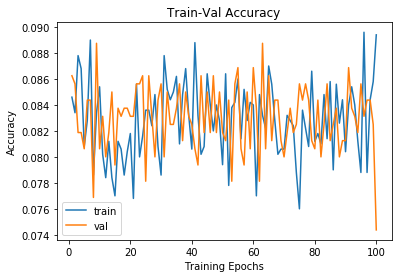

In [44]:
plt.title("Train-Val Accuracy")
plt.plot(range(1, num_epochs+1), metric_history["train"], label="train")
plt.plot(range(1, num_epochs+1), metric_history["val"], label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# Deploying the model

### 1. Load the resnet18 model:

In [45]:
from torch import nn
from torchvision import models

model_resnet18 = models.resnet18(pretrained=False)
num_filters = model_resnet18.fc.in_features
num_classes = 10

model_resnet18.fc = nn.Linear(num_filters, num_classes)

### 2. Let's load state_dict from the stored file into the model:

In [46]:
import torch

path2weights = "./models/resnet18_pretrained.pt"
model_resnet18.load_state_dict(torch.load(path2weights))

<All keys matched successfully>

### 3. Then, we will set the model in evaluation mode:

In [47]:
model_resnet18.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### 4. Next, we will move the model onto the CUDA device if available:

In [48]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    model_resnet18 = model_resnet18.to(device)

### 5. Next, we will develop a helper function to deploy the model on a dataset.

In [56]:
# the helpher function starts with initialization:

def deploy_model(model, dataset, device,
                 num_classes=10, sanity_check=False):
    len_data = len(dataset)
    y_out = torch.zeros(len_data, num_classes)
    y_gt = np.zeros((len_data), dtype="uint8")
    model = model.to(device)
    elapsed_time = []
    
    with torch.no_grad():
        for i in range(len_data):
            x, y = dataset[i]
            y_gt[i] = y
            start = time.time()
            yy = model(x.unsqueeze(0).to(device))
            y_out[i] = torch.softmax(yy, dim=1)
            elapsed = time.time() - start
            elapsed_time.append(elapsed)
            
            if sanity_check is True:
                break
                
    inference_time = np.mean(elapsed_time) * 1000
    print("average inference time per image on %s: %.2f ms"
         %(device, inference_time))
    
    return y_out.numpy(), y_gt

### 6. Then, we will call the function to deploy the model on the validation dataset:

In [57]:
import time
import numpy as np

y_out, y_gt = deploy_model(model_resnet18, val_ds, device=device, sanity_check=False)
print(y_out.shape, y_gt.shape)

average inference time per image on cuda: 2.42 ms
(1600, 10) (1600,)


### 7. Let's calculate the accuracy of the model on the validation dataset using the predicted outputs:

In [58]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(y_out, axis=1)
print(y_pred.shape, y_gt.shape)

acc = accuracy_score(y_pred, y_gt)
print("accuracy: %.2f" %acc)

(1600,) (1600,)
accuracy: 0.08


### 8. Let's deploy the model on test_ds:

In [60]:
y_out, y_gt = deploy_model(model_resnet18, test_ds, device=device)

y_pred = np.argmax(y_out, axis=1)
acc = accuracy_score(y_pred, y_gt)
print(acc)

average inference time per image on cuda: 2.43 ms
0.0840625


### 9. Next, we will display a few sample images from test_ds:

image indices: [5157  235 3980 5192]
torch.Size([3, 100, 394])


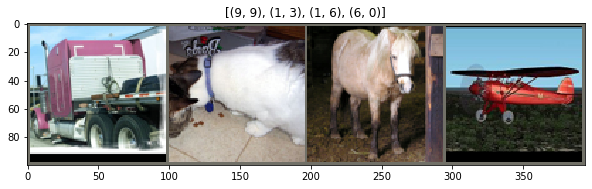

In [61]:
# we will import the required packages:

from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(1)

# Then, we will define the helper function:

def imshow(inp, title=None):
    mean = [0.4467016, 0.43980986, 0.40664646]
    std = [0.22414584, 0.22148906, 0.22389975]
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array(mean)
    std = np.array(std)
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated
    
# then, we will create a grid and display it:
grid_size = 4
rnd_inds = np.random.randint(0, len(test_ds), grid_size)
print("image indices:", rnd_inds)

x_grid_test = [test_ds[i][0] for i in rnd_inds]
y_grid_test = [(y_pred[i], y_gt[i]) for i in rnd_inds]

x_grid_test = utils.make_grid(x_grid_test, nrow=4, padding=2)
print(x_grid_test.shape)

plt.rcParams['figure.figsize'] = (10, 5)
imshow(x_grid_test, y_grid_test)

### 10. Let's also measure the inference time on the cpu device:

In [62]:
device_cpu = torch.device("cpu")
y_out, y_gt = deploy_model(model_resnet18, val_ds, device=device_cpu,
                           sanity_check=False)
print(y_out.shape, y_gt.shape)

average inference time per image on cpu: 18.21 ms
(1600, 10) (1600,)
